## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/revision/1759387/2138187/programming-languages-over-time) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','go','delphi','dart','flutter','rust','reactjs')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [10]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c#,504
3,2008-08-01 00:00:00,c++,164
4,2008-08-01 00:00:00,delphi,14


In [4]:
df.tail()

,DATE,TAG,POSTS
2918,2024-01-01 00:00:00,r,1855
2919,2024-01-01 00:00:00,reactjs,3343
2920,2024-01-01 00:00:00,ruby,166
2921,2024-01-01 00:00:00,rust,476
2922,2024-01-01 00:00:00,swift,924


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [61]:
df.shape

(2769, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [62]:
df.count()

DATE     2769
TAG      2769
POSTS    2769
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [11]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,43939
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1610248
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,803902
dart,2011-09-01 00:00:002011-10-01 00:00:002011-11-...,92625
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,51650
flutter,2011-08-01 00:00:002012-09-01 00:00:002012-11-...,173393
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,72169
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1912465
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2521080


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [6]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,186,186
c#,187,187
c++,186,186
dart,149,149
delphi,186,186
flutter,108,108
go,171,171
java,186,186
javascript,186,186


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [65]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [66]:
df.DATE[1]

'2008-08-01 00:00:00'

In [67]:
type(df['DATE'][1])

str

In [7]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [12]:
# Convert Entire Column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c#,504
3,2008-08-01,c++,164
4,2008-08-01,delphi,14


## Data Manipulation



In [14]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu'],
                        'Power': [100, 80, 25, 50, 99, 75, 5]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5


In [15]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75.0,99.0,5.0,NaN
Young,80.0,100.0,25.0,50.0


In [16]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [17]:
reshaped_df.shape

(187, 17)

In [18]:
reshaped_df.columns

Index(['assembly', 'c#', 'c++', 'dart', 'delphi', 'flutter', 'go', 'java',
       'javascript', 'perl', 'php', 'python', 'r', 'reactjs', 'ruby', 'rust',
       'swift'],
      dtype='object', name='TAG')

In [19]:
reshaped_df.head()

TAG,assembly,c#,c++,dart,delphi,flutter,go,java,javascript,perl,php,python,r,reactjs,ruby,rust,swift
DATE,,,,,,,,,,,,,,,,,
2008-07-01,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,504.0,164.0,NaN,14.0,NaN,NaN,222.0,163.0,28.0,157.0,119.0,NaN,NaN,70.0,NaN,NaN
2008-09-01,28.0,1639.0,755.0,NaN,104.0,NaN,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,NaN,286.0,NaN,NaN
2008-10-01,16.0,1987.0,807.0,NaN,112.0,NaN,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,NaN,247.0,NaN,NaN
2008-11-01,16.0,1729.0,734.0,NaN,140.0,NaN,NaN,954.0,580.0,97.0,499.0,448.0,1.0,NaN,157.0,NaN,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [20]:
reshaped_df.count() 

TAG
assembly      186
c#            187
c++           186
dart          149
delphi        186
flutter       108
go            171
java          186
javascript    186
perl          186
php           186
python        186
r             184
reactjs       131
ruby          186
rust          141
swift         178
dtype: int64

In [21]:
reshaped_df.isna().values.any()

True

In [22]:
reshaped_df.fillna(0, inplace=True) 

In [23]:
reshaped_df.head()

TAG,assembly,c#,c++,dart,delphi,flutter,go,java,javascript,perl,php,python,r,reactjs,ruby,rust,swift
DATE,,,,,,,,,,,,,,,,,
2008-07-01,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,504.0,164.0,0.0,14.0,0.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,0.0,70.0,0.0,0.0
2008-09-01,28.0,1639.0,755.0,0.0,104.0,0.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,0.0,286.0,0.0,0.0
2008-10-01,16.0,1987.0,807.0,0.0,112.0,0.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,0.0,247.0,0.0,0.0
2008-11-01,16.0,1729.0,734.0,0.0,140.0,0.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,0.0,157.0,0.0,0.0


In [24]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

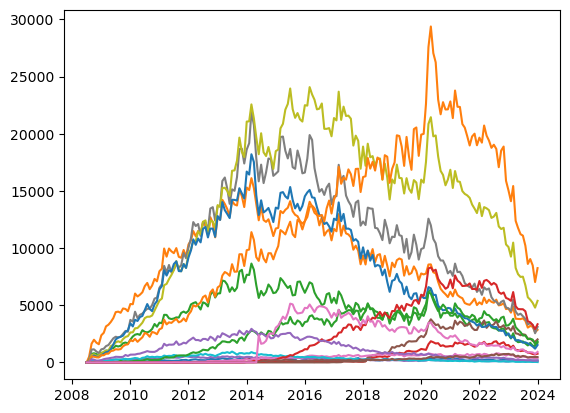

In [26]:
plt.plot(reshaped_df.index, reshaped_df)
# alternative way of selecting the column
# plt.plot(reshaped_df.index, reshaped_df['java'])

plt.show()

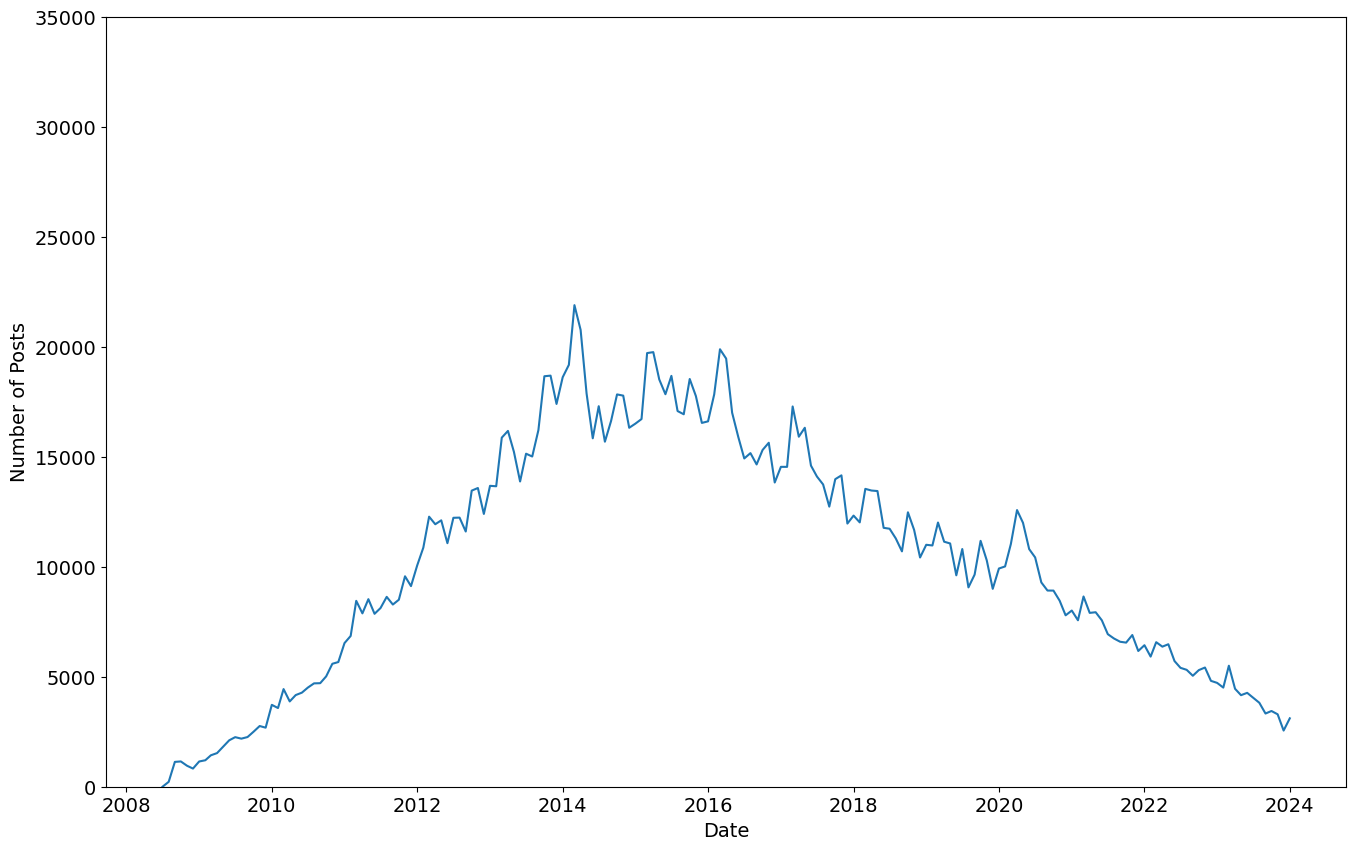

In [27]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

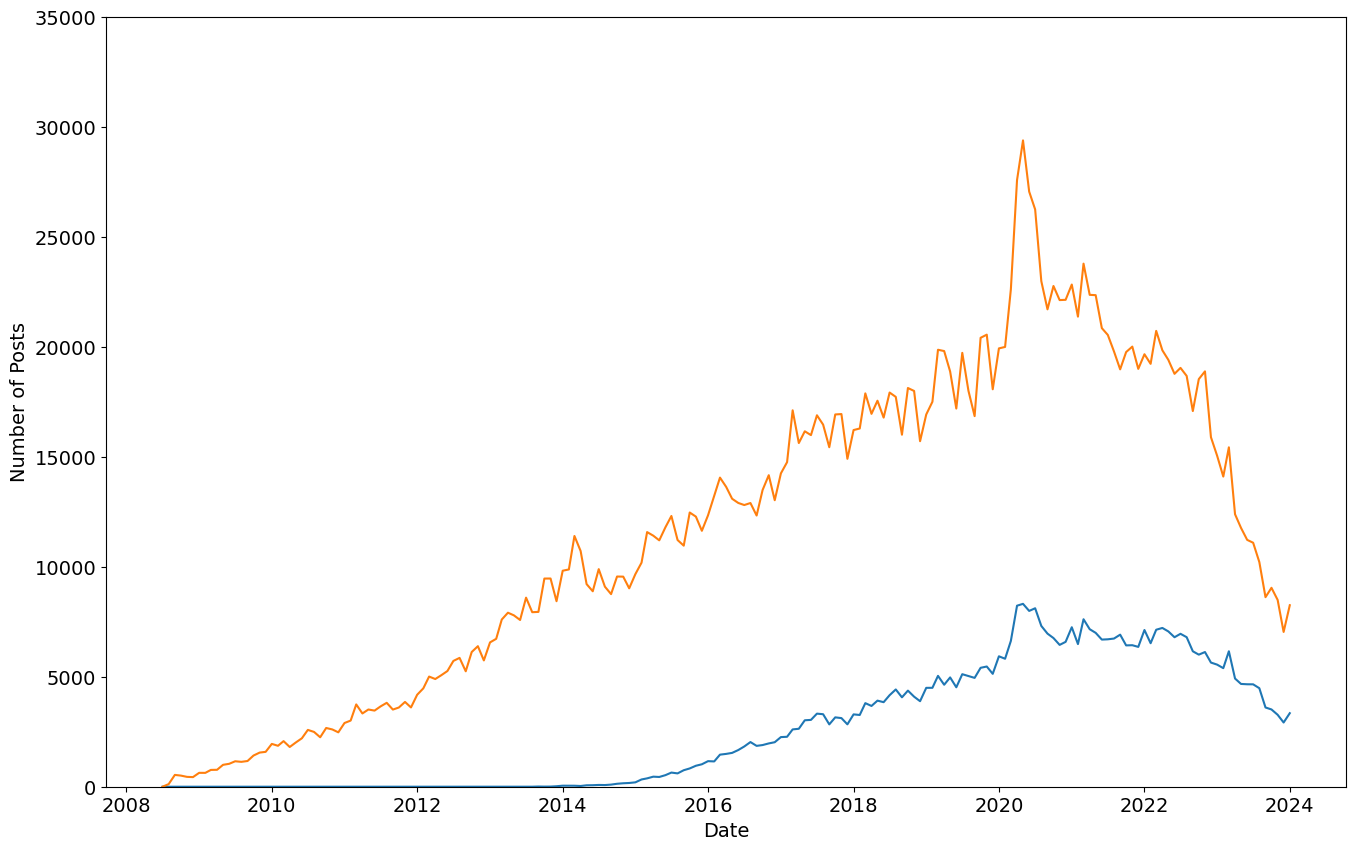

In [28]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.reactjs)
plt.plot(reshaped_df.index, reshaped_df.python)

plt.show()

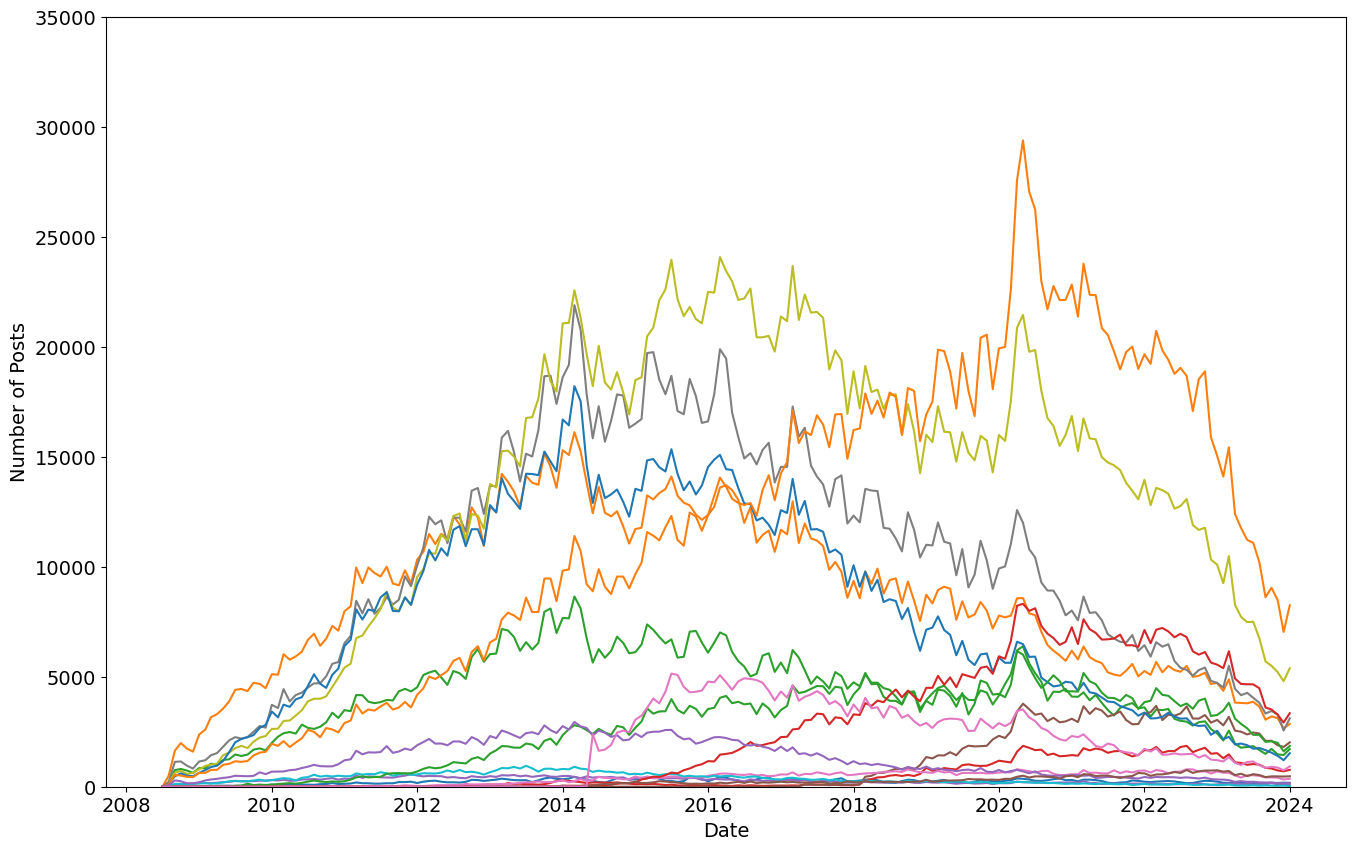

In [29]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot all languages using for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

plt.show()

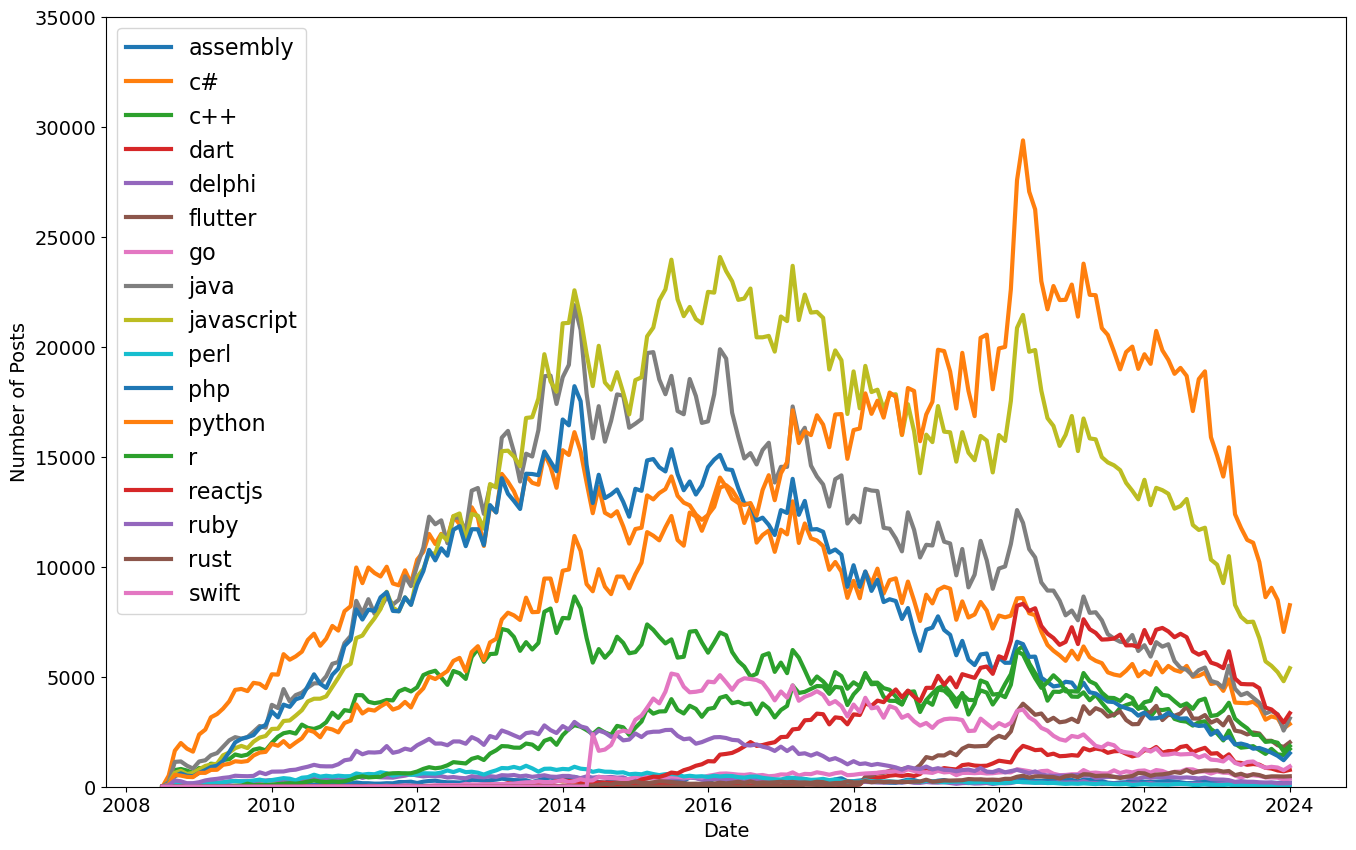

In [30]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

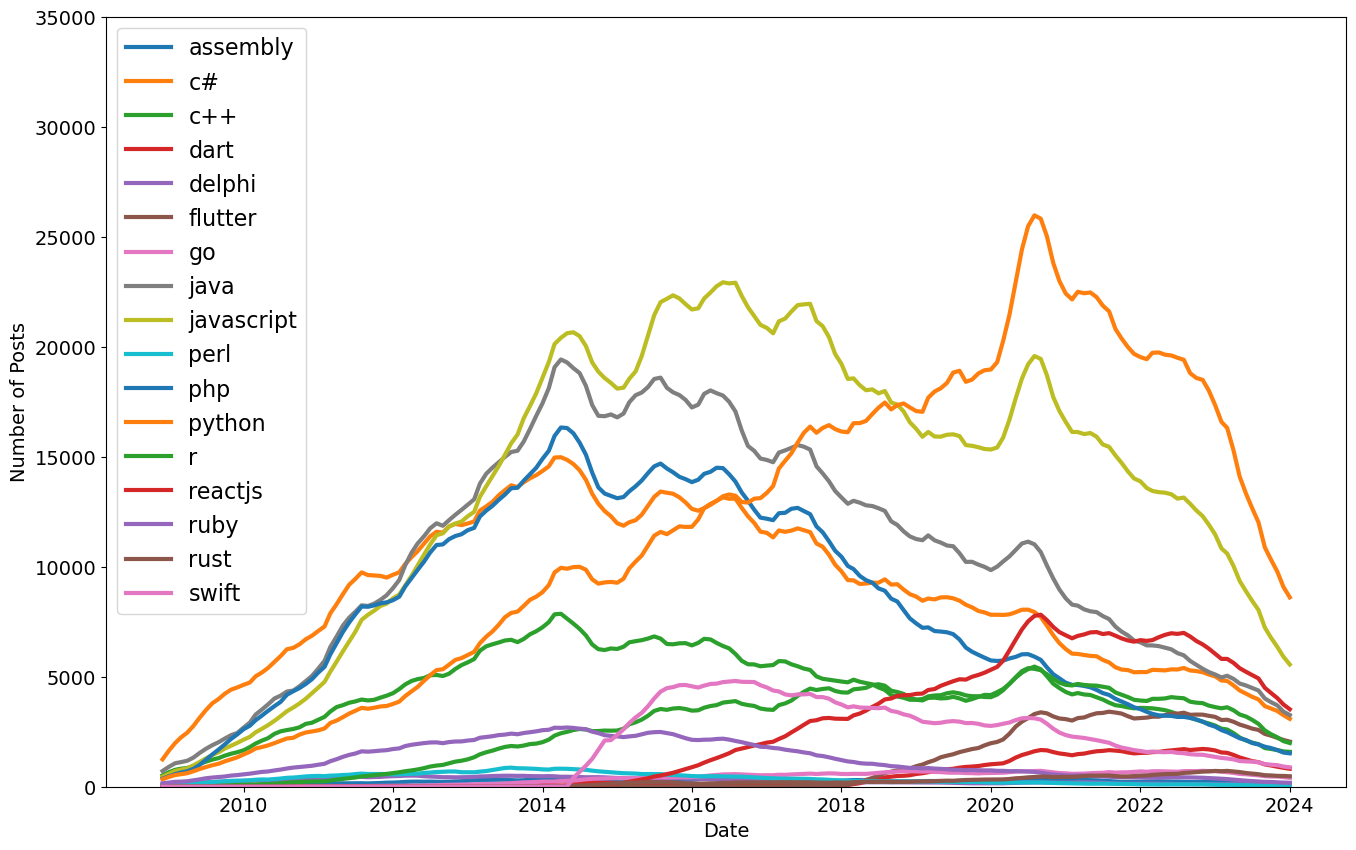

In [31]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

plt.show()

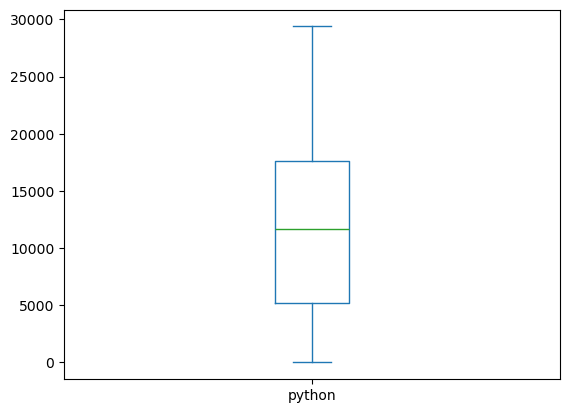

In [44]:
reshaped_df['python'].plot.box()
plt.show()

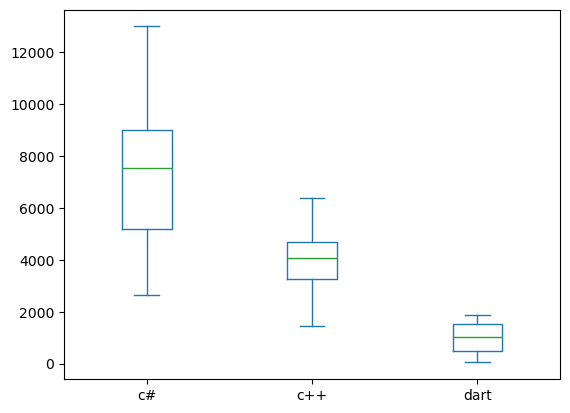

In [89]:
reshaped_df.iloc[100:900,[1, 2, 3]].plot.box()
plt.show()

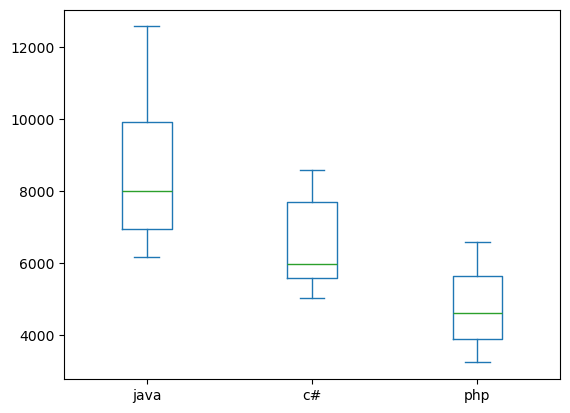

In [95]:
reshaped_df.loc['2020-01-01':'2022-01-01',['java', 'c#', 'php']].plot.box()
plt.show()

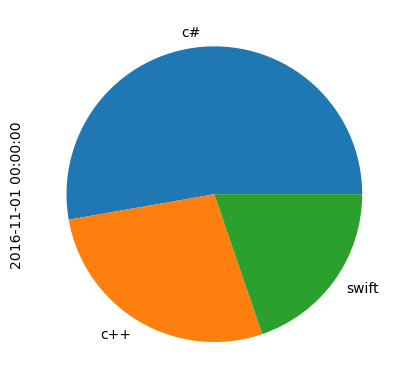

In [96]:
reshaped_df.iloc[100, [1, 2, -1]].plot.pie()
plt.show()

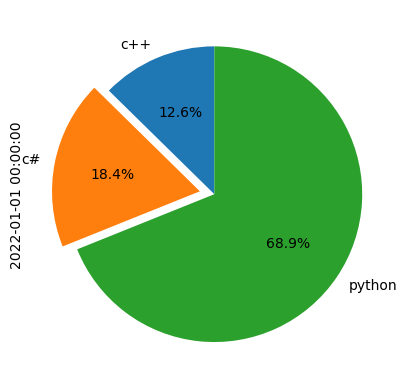

In [97]:
reshaped_df.loc['2022-1-1',['c++', 'c#', 'python']].plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1, 0)
)
plt.show()

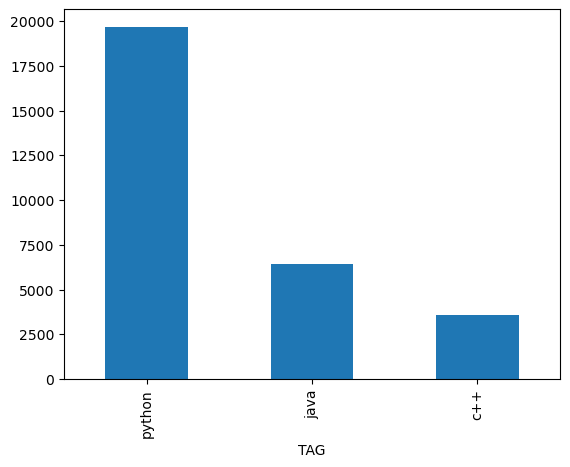

In [86]:
reshaped_df.loc['2022-1-1',['python', 'java', 'c++']].plot.bar()
plt.show()

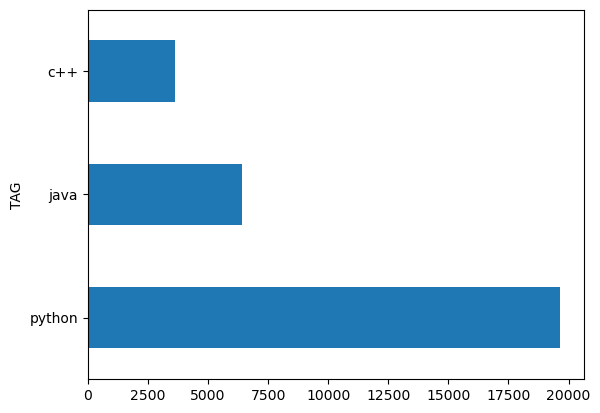

In [85]:
reshaped_df.loc['2022-1-1',['python', 'java', 'c++']].plot.barh()
plt.show()